In [146]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [148]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [150]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [152]:
df.shape

(205, 26)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [156]:
df = df.drop(columns=['CarName','symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight',
                'enginesize','enginetype','cylindernumber','fuelsystem','boreratio','stroke','compressionratio','peakrpm','citympg','highwaympg'])

In [158]:
df['price'] = df['price'].astype(int)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   car_ID      205 non-null    int64
 1   horsepower  205 non-null    int64
 2   price       205 non-null    int32
dtypes: int32(1), int64(2)
memory usage: 4.1 KB


In [162]:
df.head()

,car_ID,horsepower,price
0,1,111,13495
1,2,111,16500
2,3,154,16500
3,4,102,13950
4,5,115,17450


In [230]:
df.shape

(205, 3)

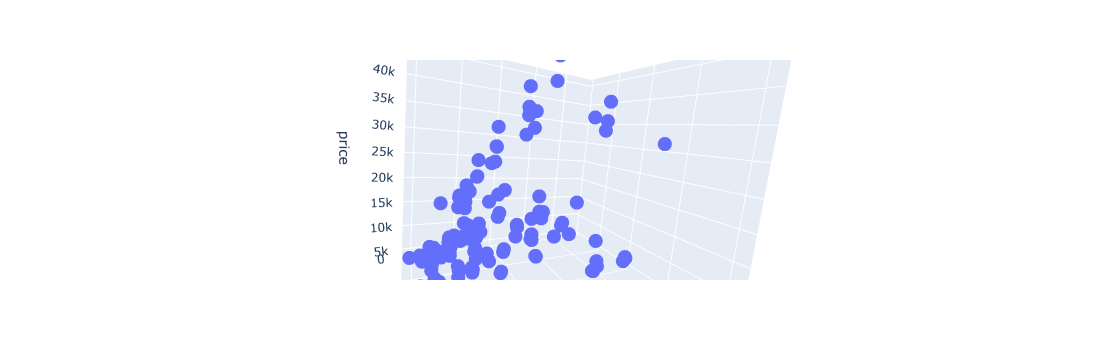

In [228]:
fig = px.scatter_3d(df, x='car_ID',y='horsepower',z='price')
fig.show()

In [170]:
x = df.iloc[:,0:2]
y = df.iloc[:,2]

In [172]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [174]:
from sklearn.linear_model import LinearRegression

In [176]:
lr = LinearRegression()

In [178]:
lr.fit(x_train,y_train)

LinearRegression()

In [184]:
x_test

,car_ID,horsepower
25,26,68
84,85,145
100,101,97
10,11,101
195,196,114
53,54,68
65,66,120
66,67,72
182,183,52
175,176,92


In [186]:
y_test

25      6692
84     14489
100     9549
10     16430
195    13415
53      6695
65     18280
66     18344
182     7775
175     9988
29     12964
153     6918
183     7975
13     21105
134    15040
94      7299
164     8238
35      7295
127    34028
24      6229
23      7957
45      8916
6      17710
12     20970
64     11245
18      5151
157     7198
173     8948
172    17669
2      16500
57     13645
3      13950
120     6229
14     24565
44      8916
178    16558
113    16695
179    15998
192    13845
184     7995
111    15580
Name: price, dtype: int32

In [204]:
lr.predict(x_test.iloc[1].values.reshape(1,2))

C:\Users\Anay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([20326.54466448])

In [206]:
y_pred = lr.predict(x_test)

In [208]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [214]:
print(f'MAE is {mean_absolute_error(y_test,y_pred)}')
print(f'MSE is {mean_squared_error(y_test,y_pred)}')
print(f'R2 Score is {r2_score(y_test,y_pred)}')

MAE is 3000.484656803712
MSE is 15742511.74004756
R2 Score is 0.5538340302611791


In [236]:
coef_x1, coef_x2 = lr.coef_

In [238]:
intercept = lr.intercept_